In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings("ignore")

In [3]:
mall = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2. Data Exploration & Preprocessing :

In [4]:
mall.shape

(200, 5)

In [5]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
mall.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [9]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
mall.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
mall['Gender']=mall['Gender'].astype('category')


In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
label = preprocessing.LabelEncoder()
mall["Gender"] = label.fit_transform(mall["Gender"])


In [16]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(mall.to_numpy()),columns=mall.columns)
df_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.860656,0.795918
196,0.984925,0.0,0.519231,0.909836,0.275510
197,0.989950,1.0,0.269231,0.909836,0.744898
198,0.994975,1.0,0.269231,1.000000,0.173469


# 3. EDA:

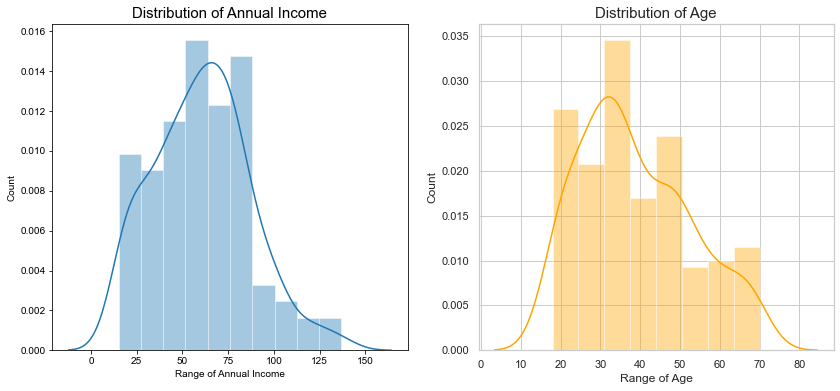

In [17]:
plt.rcParams['figure.figsize'] = (14, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(mall['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(mall['Age'], color = 'orange')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

### Interpretation:
Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,

we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.

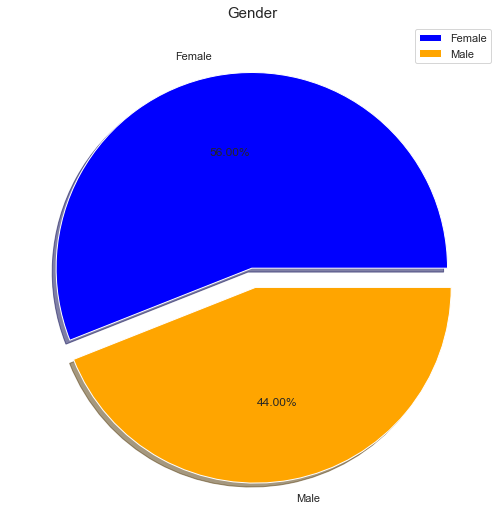

In [18]:
labels = ['Female', 'Male']
size = mall['Gender'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

### Interpretation: 

By looking at the above pie chart which explains about the distribution of Gender in the Mall

Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

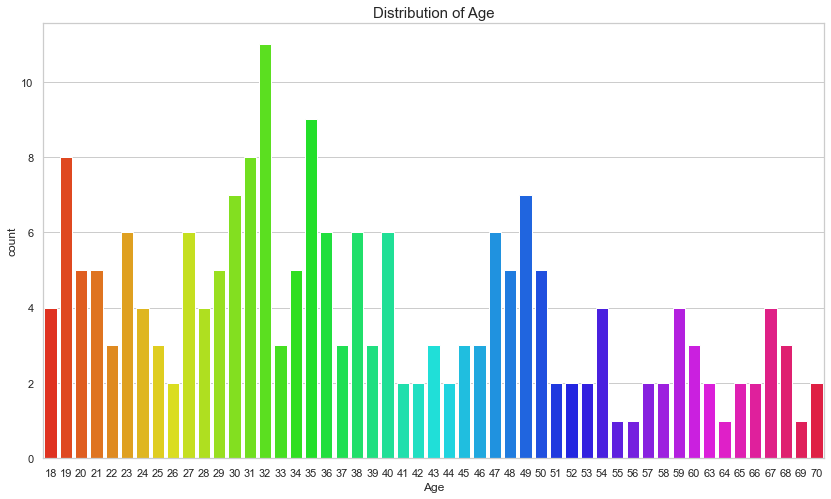

In [19]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.countplot(mall['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 15)
plt.show()

### Interpretation:

This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

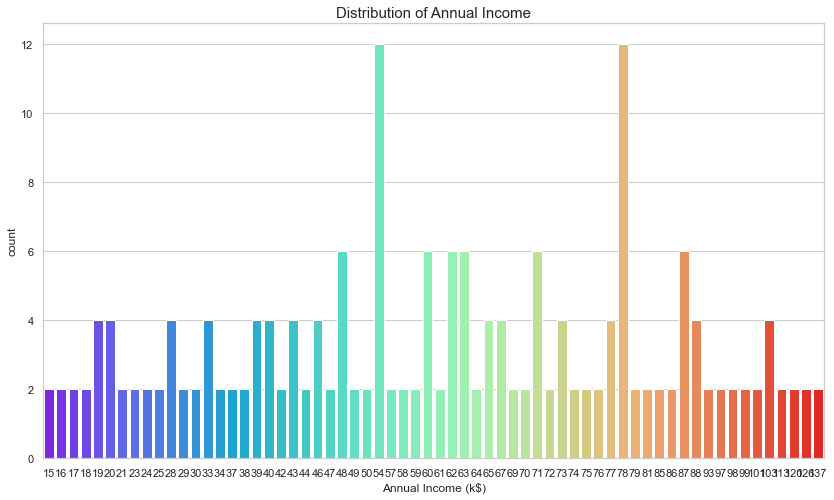

In [20]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.countplot(mall['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 15)
plt.show()

### Interpretation:

Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

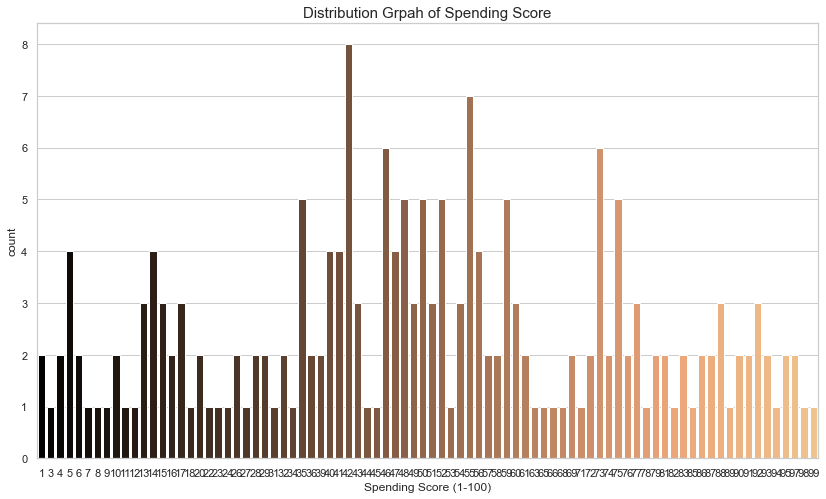

In [21]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.countplot(mall['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution Grpah of Spending Score', fontsize = 15)
plt.show()

### Interpretation :

This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.

On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mal

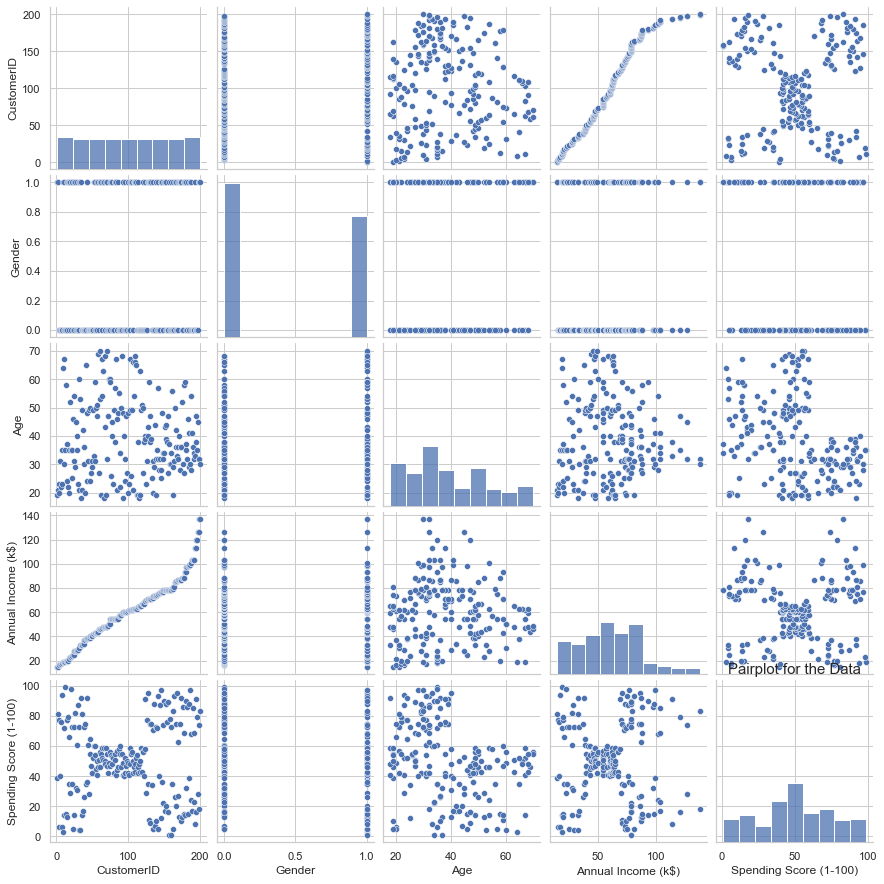

In [22]:
sns.pairplot(mall)
plt.title('Pairplot for the Data', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Correlation Factors Heat Map')

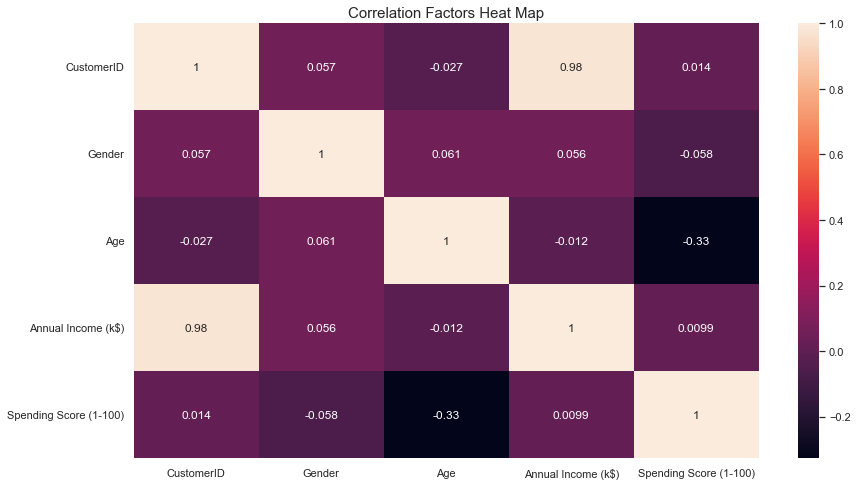

In [23]:
## Correlation coeffecients heatmap
sns.heatmap(mall.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')

### Interpretation: 
The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.


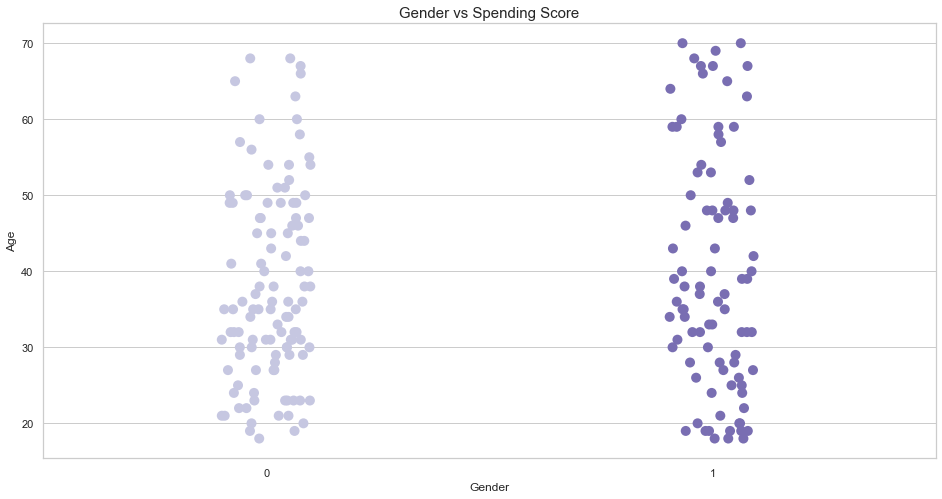

In [24]:
plt.rcParams['figure.figsize'] = (16, 8)
sns.stripplot(mall['Gender'], mall['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 15)
plt.show()

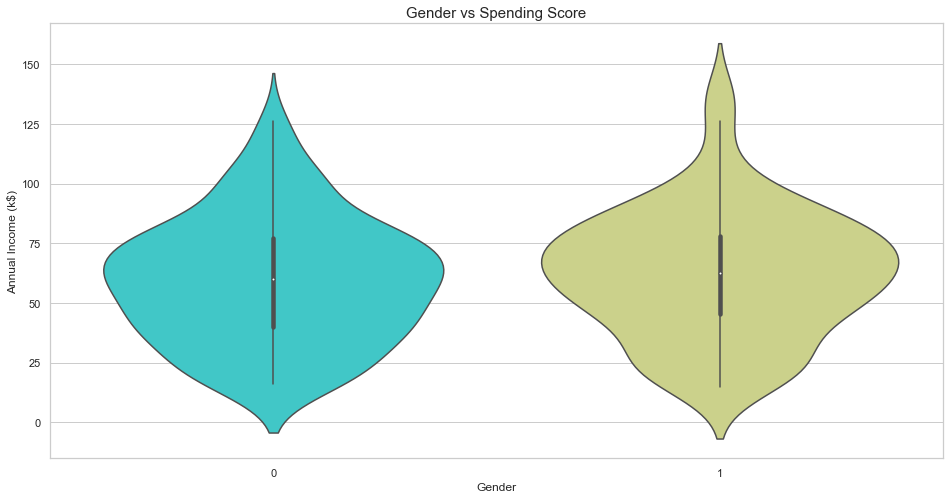

In [25]:
plt.rcParams['figure.figsize'] = (16,8)
sns.violinplot(mall['Gender'], mall['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 15)
plt.show()

### Interpretation:

A Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

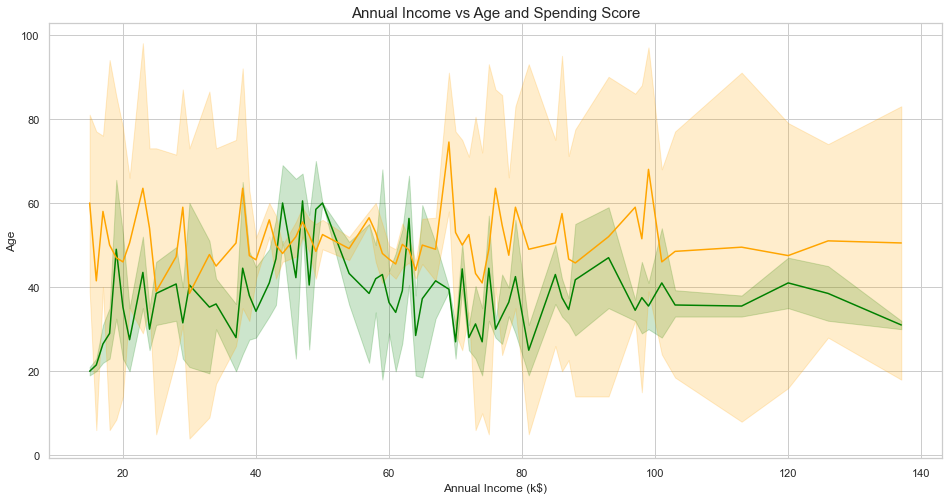

In [26]:
x = mall['Annual Income (k$)']
y = mall['Age']
z = mall['Spending Score (1-100)']

sns.lineplot(x, y, color = 'green')
sns.lineplot(x, z, color = 'orange')
plt.title('Annual Income vs Age and Spending Score', fontsize = 15)
plt.show()

## Interpretation: 
The above Plot Between Annual Income and Age represented by a green color line, and a plot between Annual Income and the Spending Score represented by a oragne color. shows how Age and Spending Varies with Annual Income.

In [27]:
X = df_scaled.iloc[:, [3, 4]].values
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

# 1. MODEL 1 : KMEANS

In [28]:
Kmeans_model = KMeans(n_clusters=3)
Kmeans_model.fit(X)


KMeans(n_clusters=3)

In [29]:
cluster_centroid = Kmeans_model.cluster_centers_
cluster_centroid

array([[0.58638083, 0.82783883],
       [0.25631369, 0.5426549 ],
       [0.46737705, 0.1577551 ]])

In [30]:
labels = Kmeans_model.labels_
labels

array([1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [31]:
Kmeans_model.inertia_

9.058985215159453

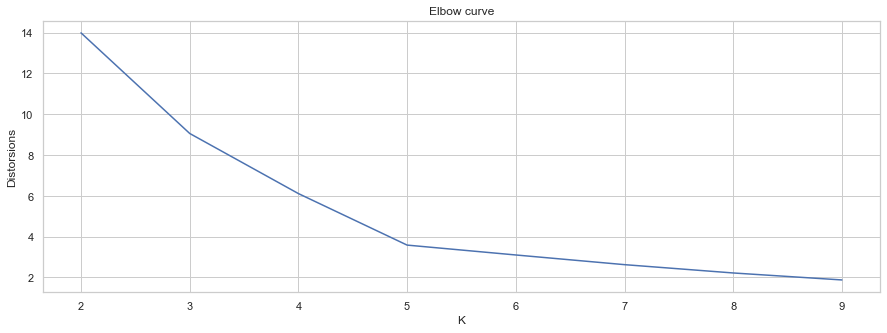

In [32]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.3334020547986479
For n_clusters = 3 The average silhouette_score is : 0.45149093095396486
For n_clusters = 4 The average silhouette_score is : 0.49620078746385005
For n_clusters = 5 The average silhouette_score is : 0.5594854531357838
For n_clusters = 6 The average silhouette_score is : 0.5354954062760995
For n_clusters = 7 The average silhouette_score is : 0.5168021892370785
For n_clusters = 9 The average silhouette_score is : 0.4416331298540267


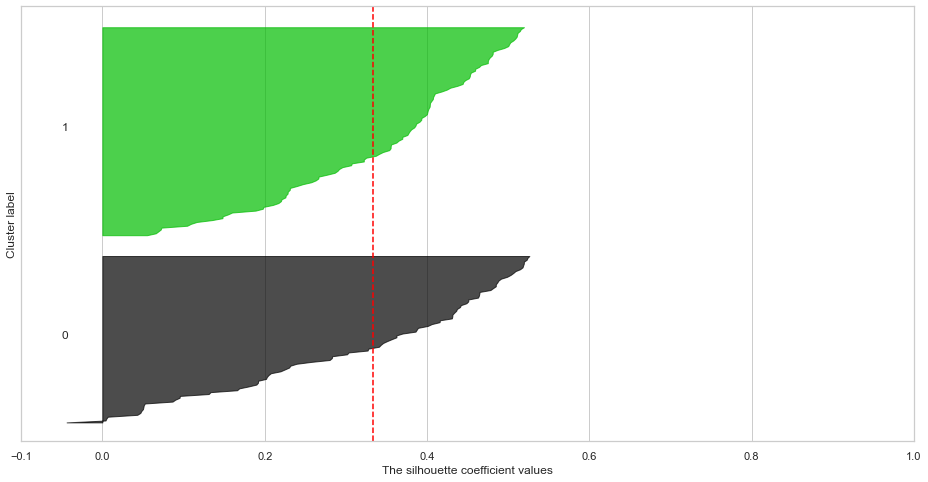

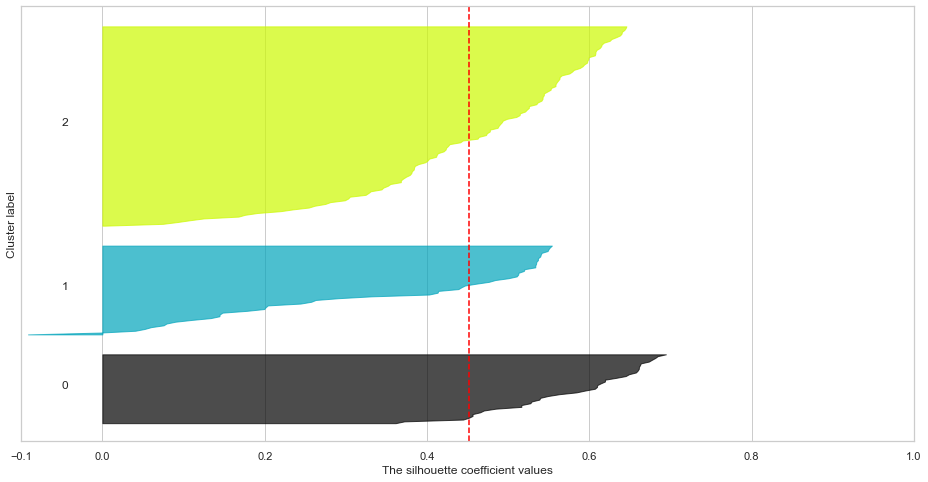

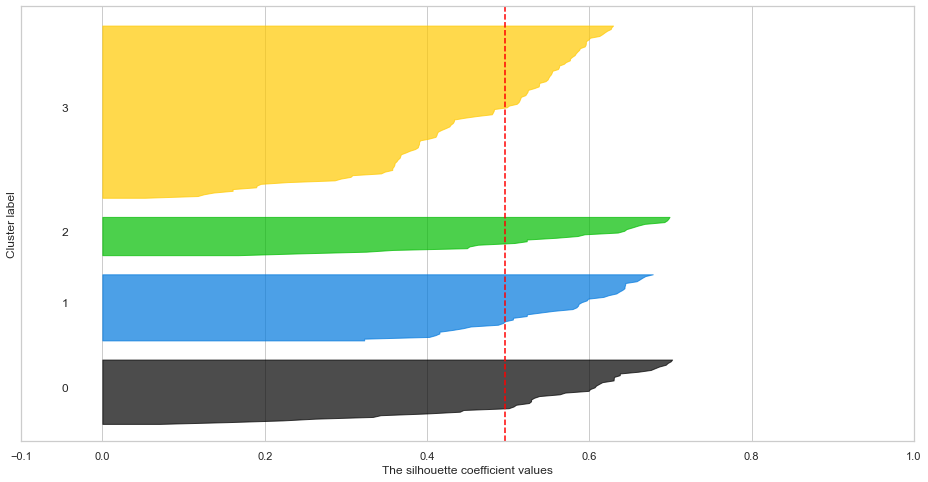

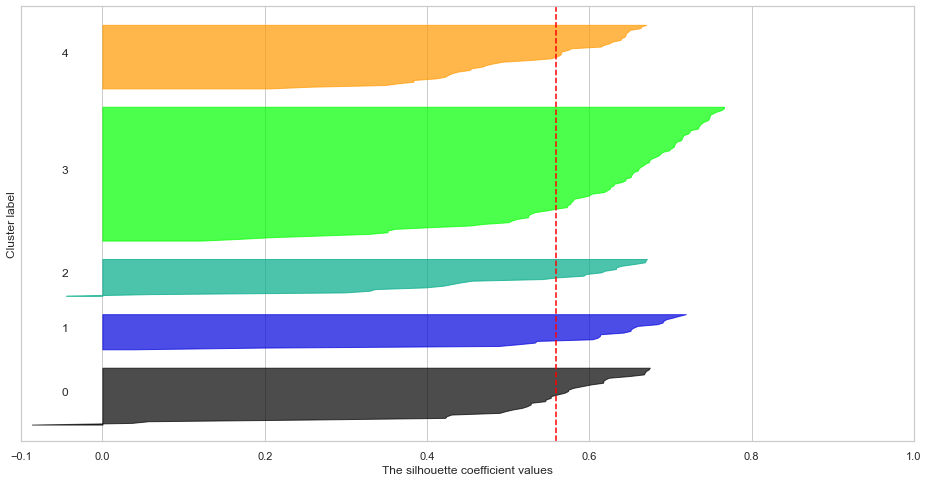

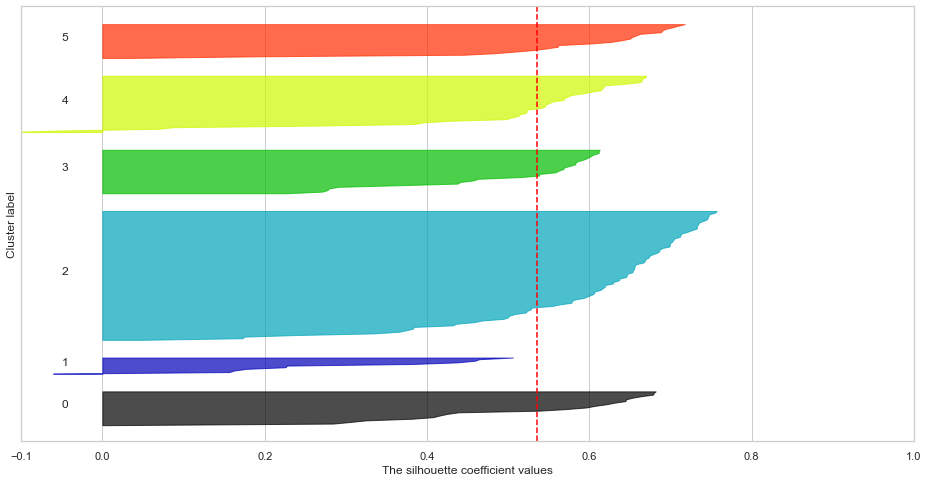

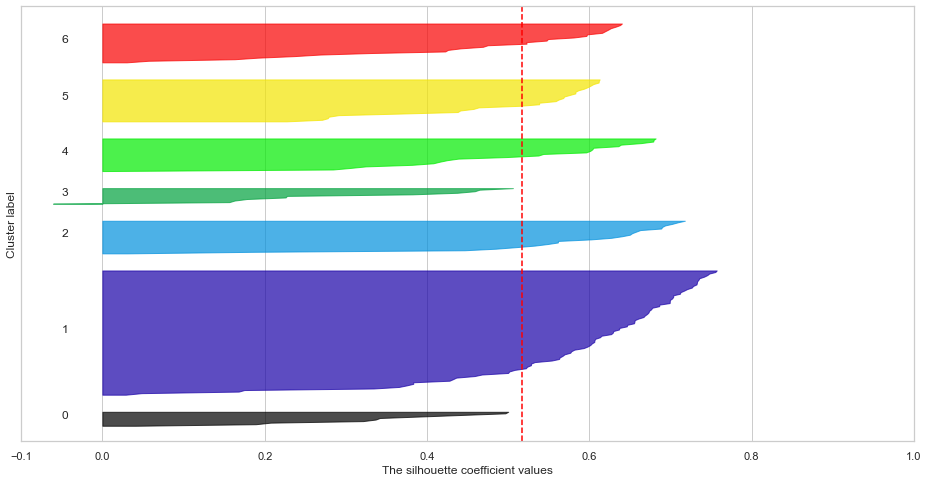

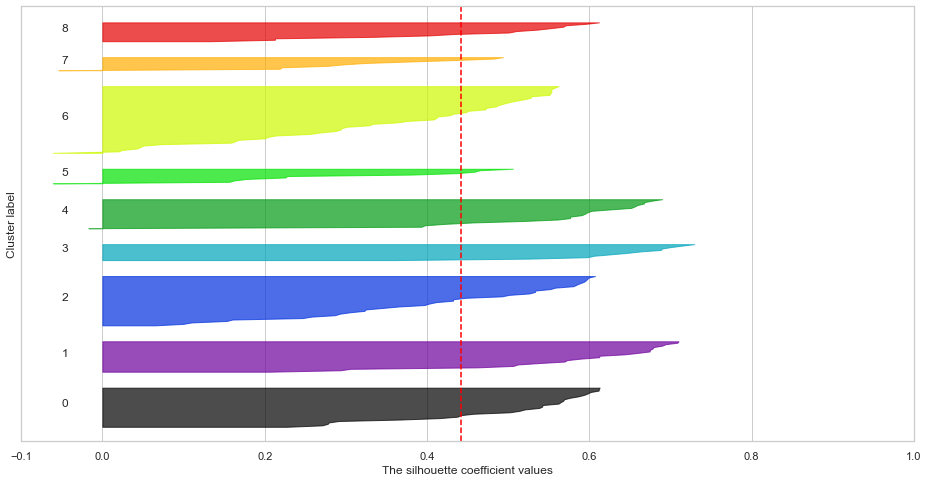

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [34]:
Kmeans_model2 = KMeans(n_clusters=5)
Kmeans_model2.fit(X)

KMeans(n_clusters=5)

In [35]:
cluster_centroid2 = Kmeans_model2.cluster_centers_
cluster_centroid2

array([[0.09265859, 0.20319432],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894]])

In [36]:
labels = Kmeans_model2.labels_
labels

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [37]:
Kmeans_model2.inertia_

3.5831179059525606

In [38]:
y_pred = Kmeans_model2.fit_predict(X)

## The lesser the model inertia, the better the model fit. We can see that the inertia has decreased from the previous model. So, this a good model fit to the data.

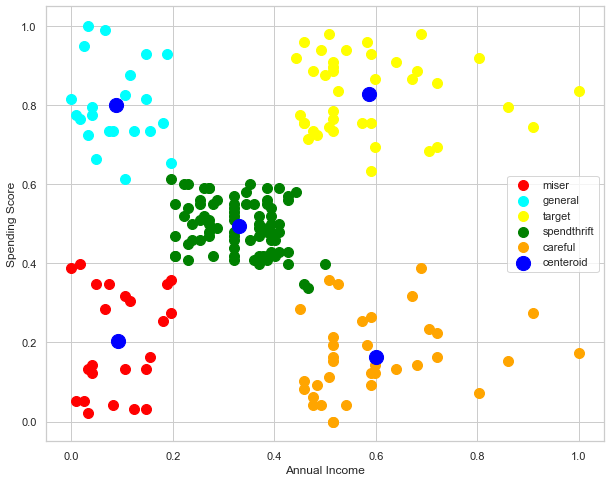

In [39]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'cyan', label = 'general')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'yellow', label = 'target')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(Kmeans_model2.cluster_centers_[:,0], Kmeans_model2.cluster_centers_[:, 1], s = 200, c = 'blue' , label = 'centeroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()
plt.show()
plt.show()

## This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall

In [40]:
x = mall.iloc[:, [2, 4]].values
x.shape

(200, 2)

In [41]:
Kmeans_modelx = KMeans(n_clusters=3)
Kmeans_modelx.fit(x)
cluster_centroid = Kmeans_modelx.cluster_centers_
cluster_centroid
labels = Kmeans_modelx.labels_


In [42]:
Kmeans_modelx.inertia_

45840.67661610867

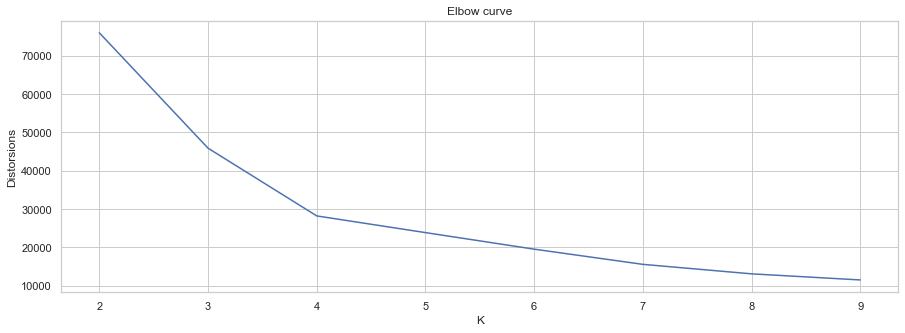

In [43]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.4692341232501655
For n_clusters = 3 The average silhouette_score is : 0.45300127016521263
For n_clusters = 4 The average silhouette_score is : 0.49973941540141753
For n_clusters = 5 The average silhouette_score is : 0.46553524067755037
For n_clusters = 6 The average silhouette_score is : 0.4376185638584134
For n_clusters = 7 The average silhouette_score is : 0.42313509747504796
For n_clusters = 9 The average silhouette_score is : 0.41671999499926166


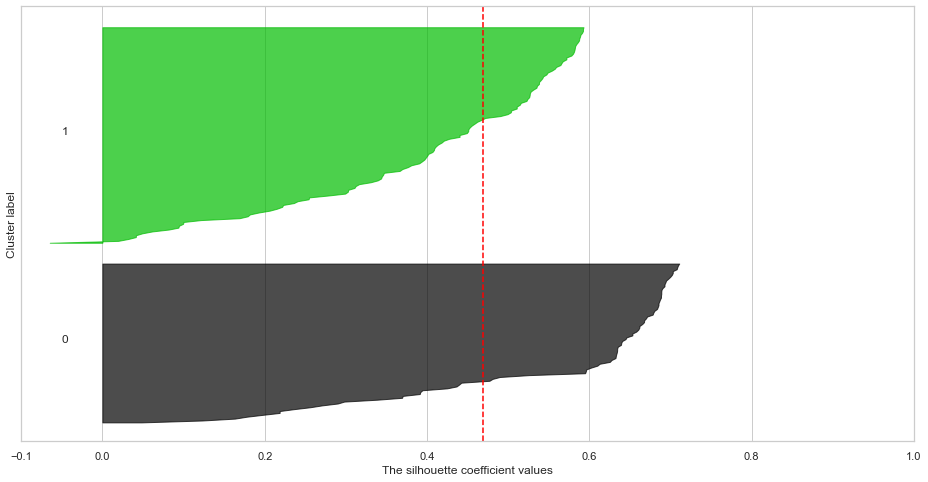

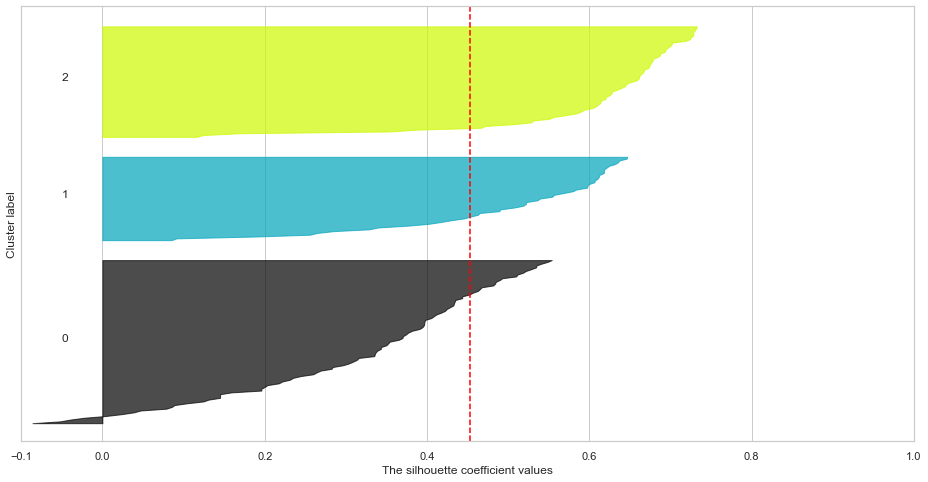

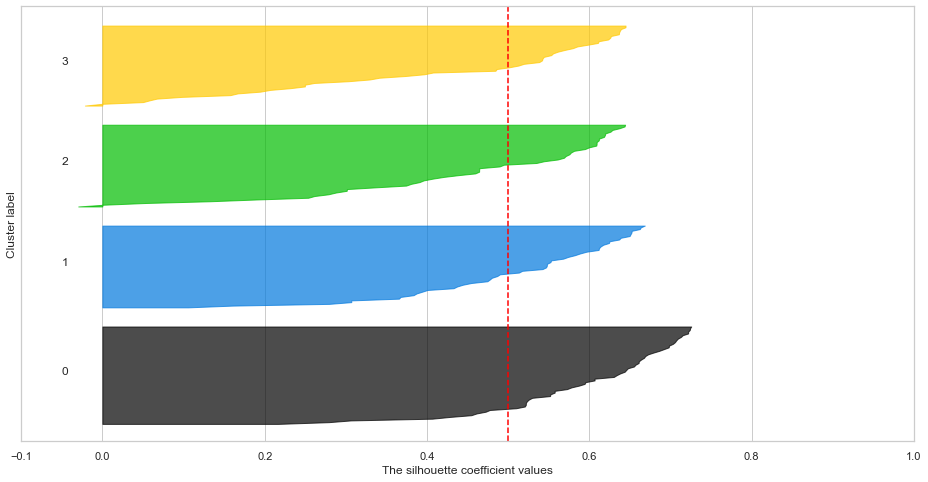

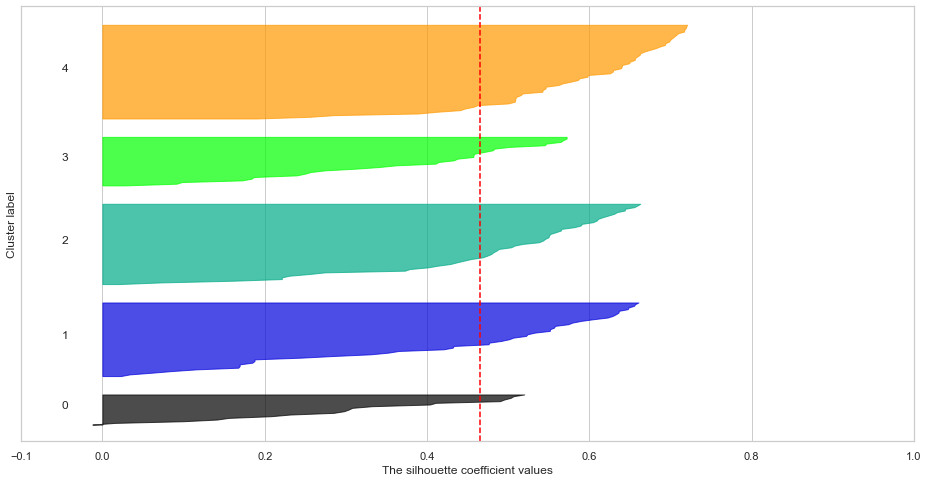

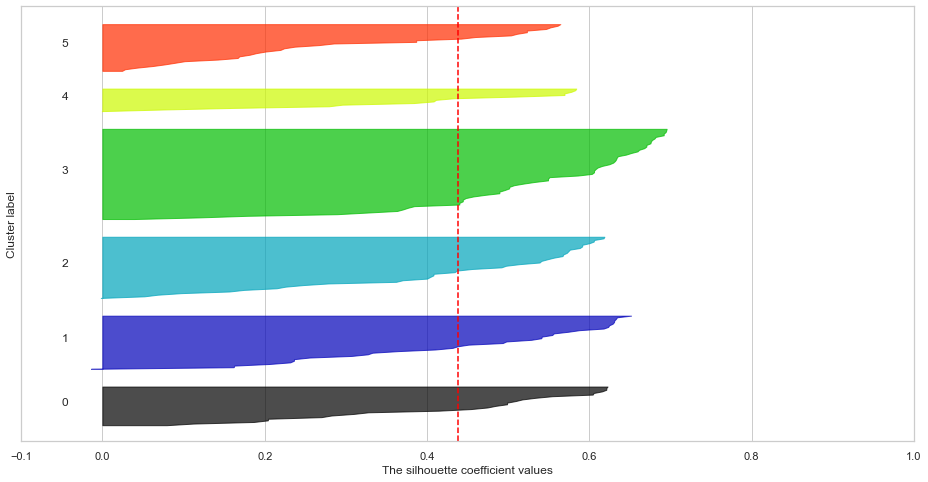

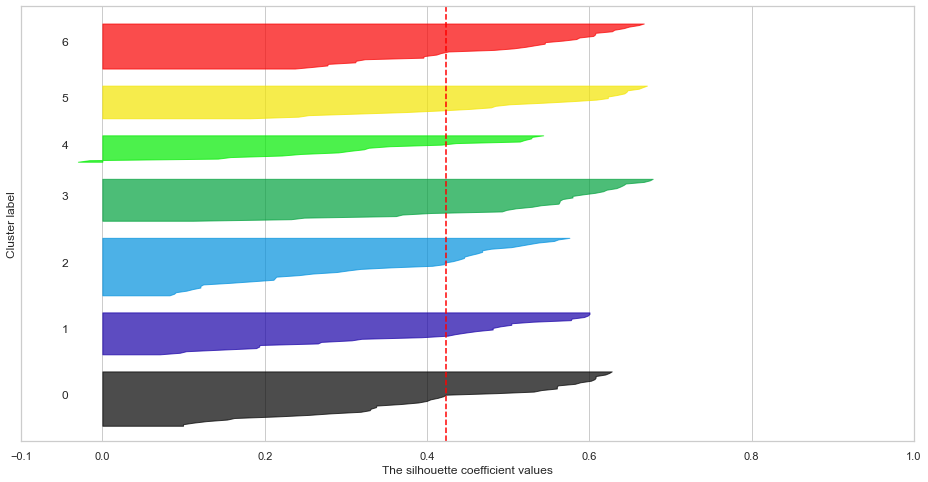

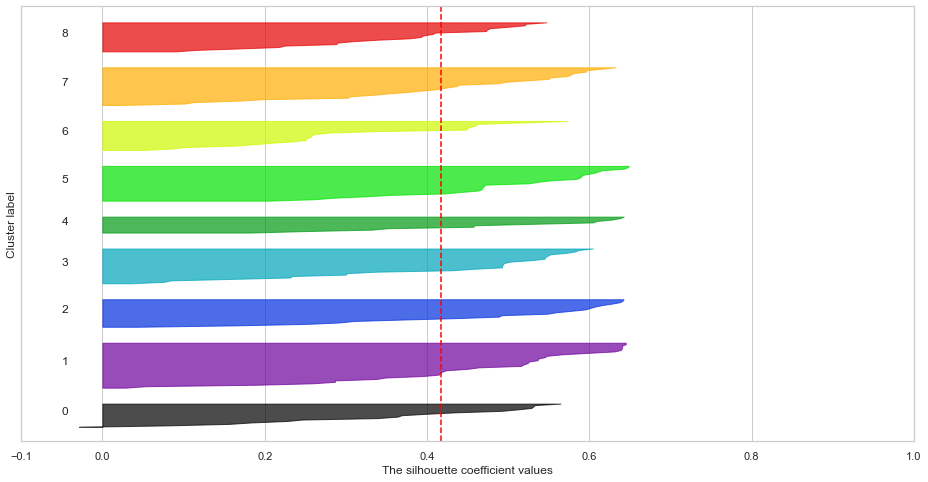

In [44]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [45]:
Kmeans_modelx = KMeans(n_clusters=4)
Kmeans_modelx.fit(x)
cluster_centroid = Kmeans_modelx.cluster_centers_
cluster_centroid
labels = Kmeans_modelx.labels_



In [46]:
y_pred = Kmeans_modelx.fit_predict(x)

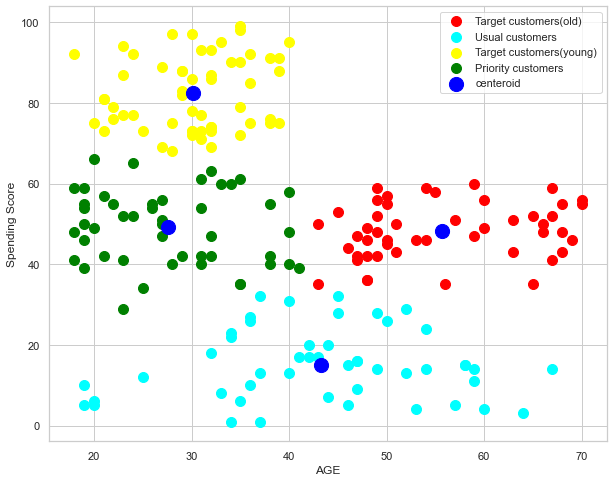

In [48]:
plt.figure(figsize=(10, 8))
plt.scatter(x[y_pred == 0, 0],x[y_pred == 0, 1], s = 100, c = 'red', label = 'Target customers(old)')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'cyan', label = 'Usual customers')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'yellow', label = 'Target customers(young)')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'green', label = 'Priority customers')
plt.scatter(Kmeans_modelx.cluster_centers_[:,0], Kmeans_modelx.cluster_centers_[:, 1], s = 200, c = 'blue' , label = 'centeroid')
plt.xlabel('AGE')
plt.ylabel('Spending Score')

plt.legend()
plt.show()
plt.show()

## According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

# MODEL 2: HIERARCHICAL CLUSTERING

In [402]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

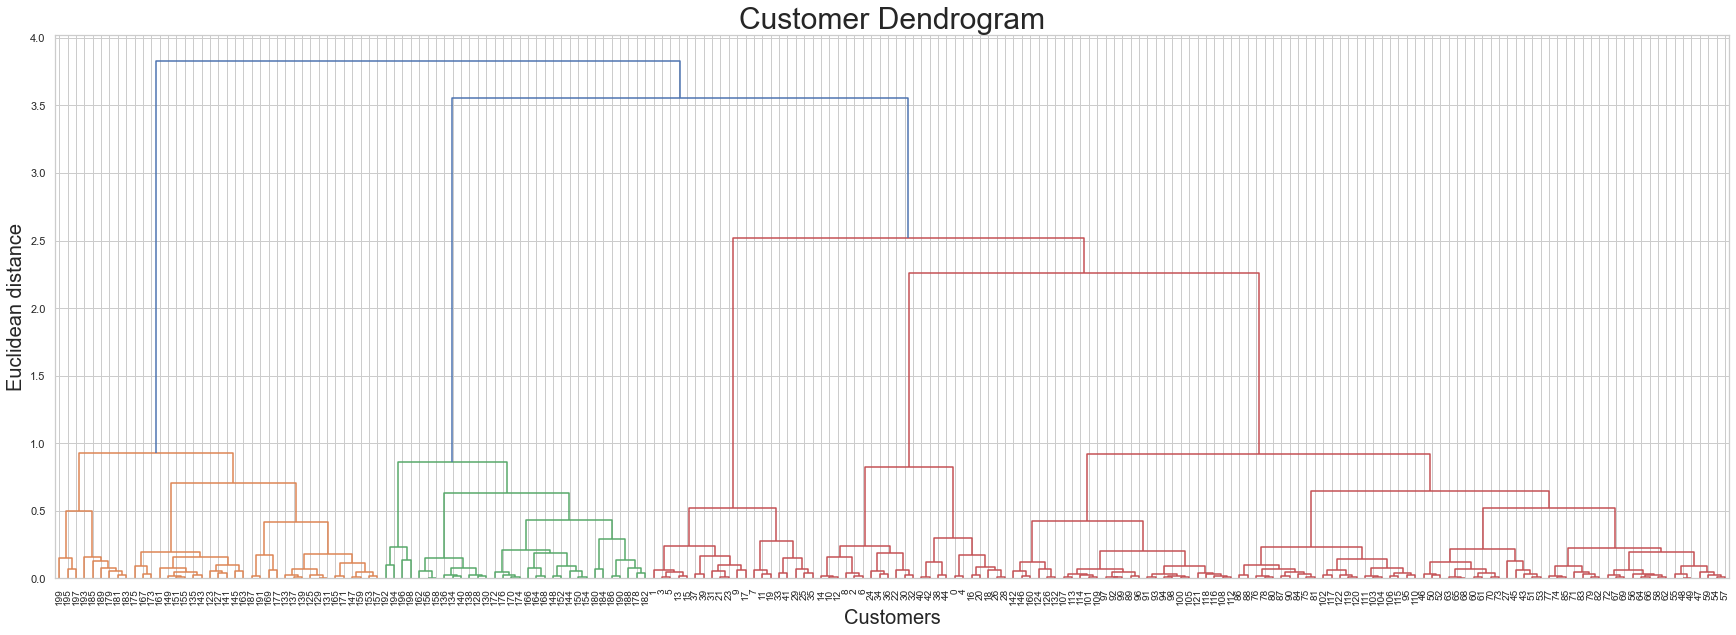

In [403]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=mall.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()


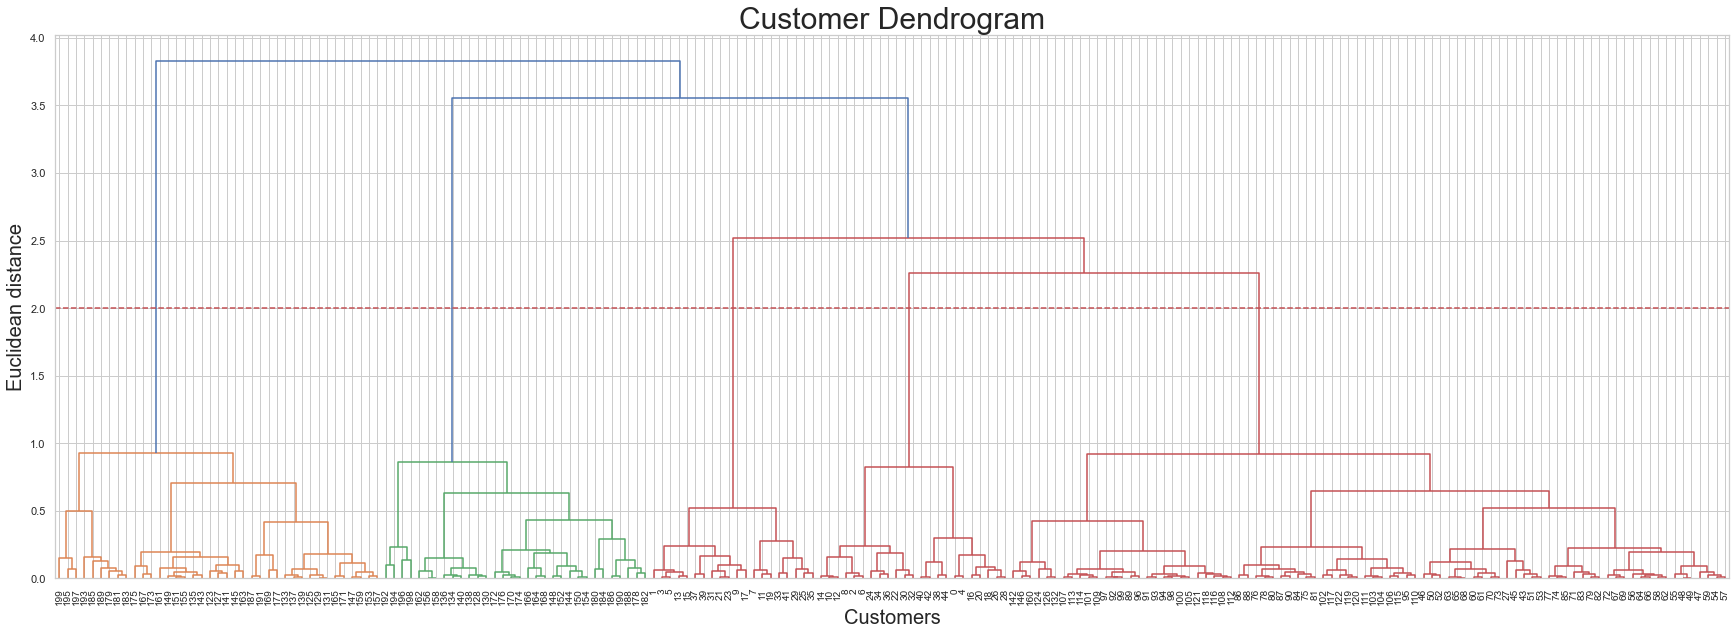

In [404]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=mall.index)
plt.axhline(y=2.0, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [405]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

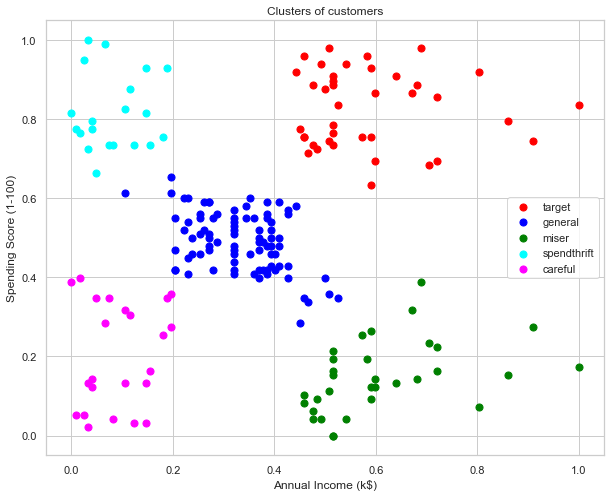

In [406]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'target')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'general')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'miser')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'spendthrift')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'careful')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## WRT AGE & SPENDING SCORE:

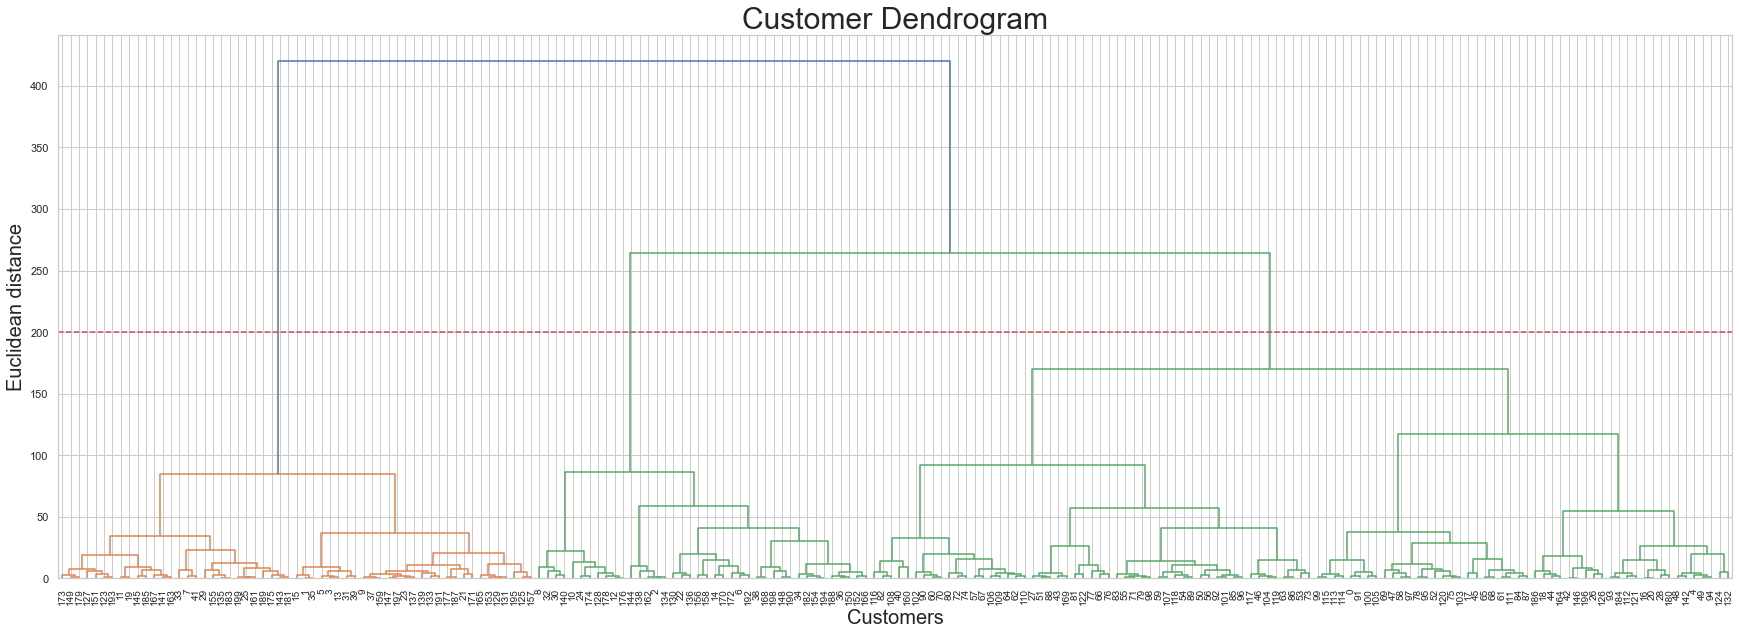

In [407]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(x, method = 'ward'),labels=mall.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [408]:
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc.fit_predict(x)

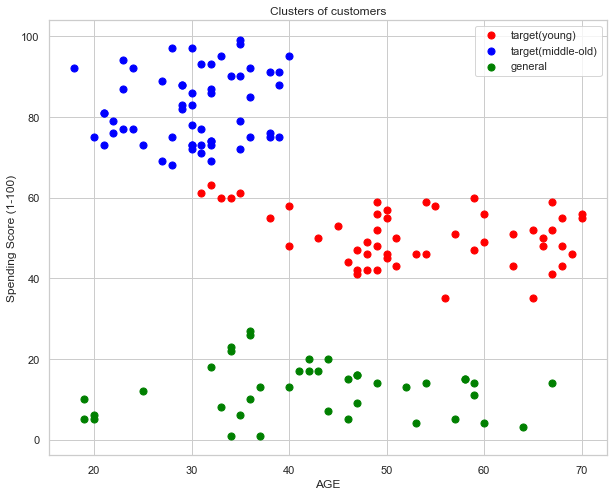

In [409]:
plt.figure(figsize=(10, 8))
plt.scatter(x[y_hc2 == 0, 0], x[y_hc2 == 0, 1], s = 50, c = 'red', label = 'target(young)')
plt.scatter(x[y_hc2 == 1, 0], x[y_hc2 == 1, 1], s = 50, c = 'blue', label = 'target(middle-old)')
plt.scatter(x[y_hc2 == 2, 0], x[y_hc2 == 2, 1], s = 50, c = 'green', label = 'general')
plt.title('Clusters of customers')
plt.xlabel('AGE')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## In the above plot, we can see 3 good clusters formed , BUT the above clusters don't clearly justify all types of customers and ranges of age because of over scattering.


# MODEL 3 : DBSCAN 

In [36]:
Z= mall.iloc[:,[3,4]].values
Z

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [86]:
Z2= mall.iloc[:,[3,4]]
Z2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [97]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(Z2)

DBSCAN()

In [271]:
colors=['purple','red','blue','green', 'yellow','cyan','black']

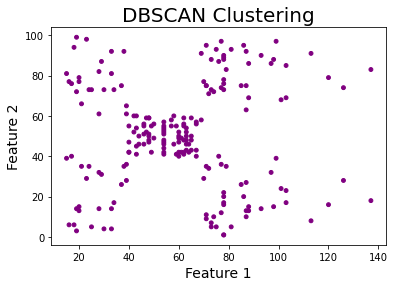

In [99]:
mall['DBSCAN_labels']=dbscan.labels_ 

plt.scatter(Z2['Annual Income (k$)'], Z2['Spending Score (1-100)'],c=mall['DBSCAN_labels'],cmap= matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [40]:
dbscan.labels_ 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [182]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(Z2)
distances, indices = nbrs.kneighbors(Z2)

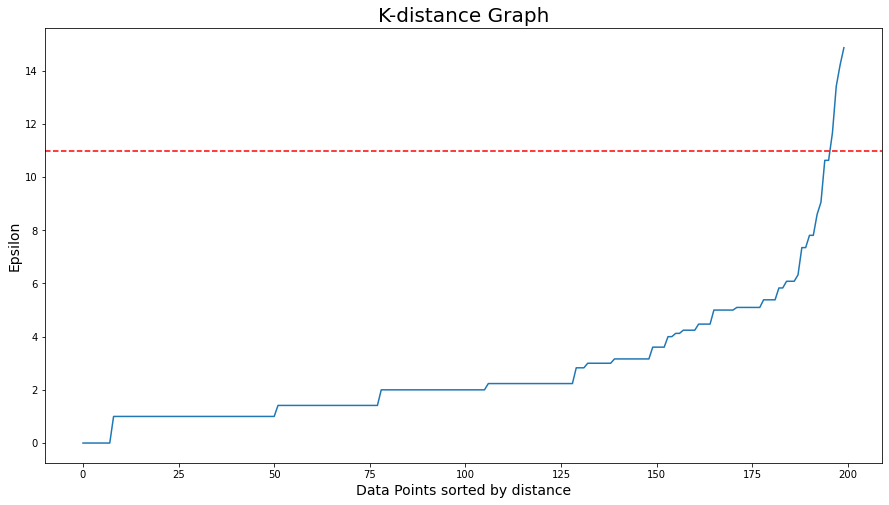

In [183]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=11, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [325]:
eps=12
for min_samples in range(2,20,2):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(Z2)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 12 | min_samples=  2 | obtained clustering:  [(1, 3), (2, 157), (3, 34), (4, 2), (5, 2), (6, 2)]
eps= 12 | min_samples=  4 | obtained clustering:  [(1, 9), (2, 157), (3, 34)]
eps= 12 | min_samples=  6 | obtained clustering:  [(1, 15), (2, 142), (3, 11), (4, 32)]
eps= 12 | min_samples=  8 | obtained clustering:  [(1, 19), (2, 137), (3, 12), (4, 32)]
eps= 12 | min_samples=  10 | obtained clustering:  [(1, 29), (2, 16), (3, 10), (4, 92), (5, 30), (6, 23)]
eps= 12 | min_samples=  12 | obtained clustering:  [(1, 42), (2, 12), (3, 93), (4, 30), (5, 23)]
eps= 12 | min_samples=  14 | obtained clustering:  [(1, 66), (2, 87), (3, 27), (4, 20)]
eps= 12 | min_samples=  16 | obtained clustering:  [(1, 69), (2, 86), (3, 19), (4, 26)]
eps= 12 | min_samples=  18 | obtained clustering:  [(1, 75), (2, 86), (3, 18), (4, 21)]


In [344]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=12,min_samples=10)
dbscan_opt.fit(Z2)

DBSCAN(eps=12, min_samples=10)

In [345]:
Z2['DBSCAN_opt_labels']=dbscan_opt.labels_
Z2['DBSCAN_opt_labels'].value_counts()

 2    92
 3    30
-1    29
 4    23
 0    16
 1    10
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.410


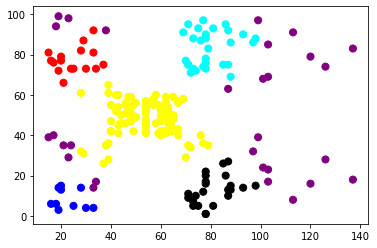

In [346]:
plt.scatter(Z2['Annual Income (k$)'], Z2['Spending Score (1-100)'], c=Z2['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=50)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Z2, Z2['DBSCAN_opt_labels']))

## The above DBSCAN shows 5 clusters formed with 29 outliers. The outliers are present because of the epsilon distance and min samples, some points not included under the distance and min samples parameters hence , are excluded as outliers.

# CONCLUSION:    Our apt choice would be Kmean Model, since it has formed clear and precise clusters for all parameters (age, spending score, annual income) with low intertia(errors).



# Hierarchichal and DBSCAN failed to cluster correctly all the parameters , hence are not a good choice. 